**About Dataset**

**Context**

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn.csv to customer_churn.csv


In [7]:
data = pd.read_csv("customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.shape

(7043, 21)

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
list(data.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [12]:
data.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [13]:
uni_dict = {}

for col in data.columns:
  uni_dict[col] = [data[col].unique()]

In [14]:
uni_dict

{'customerID': [array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
         '8361-LTMKD', '3186-AJIEK'], dtype=object)],
 'gender': [array(['Female', 'Male'], dtype=object)],
 'SeniorCitizen': [array([0, 1])],
 'Partner': [array(['Yes', 'No'], dtype=object)],
 'Dependents': [array(['No', 'Yes'], dtype=object)],
 'tenure': [array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
         21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
          9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
         36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
         54, 51, 26,  0, 39])],
 'PhoneService': [array(['No', 'Yes'], dtype=object)],
 'MultipleLines': [array(['No phone service', 'No', 'Yes'], dtype=object)],
 'InternetService': [array(['DSL', 'Fiber optic', 'No'], dtype=object)],
 'OnlineSecurity': [array(['No', 'Yes', 'No internet service'], dtype=object)],
 'OnlineBackup': [array(['Yes', 'No'

1]totalCharges is object convert to float
2]in many column for 'No' there are two different values

In [15]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


In [16]:
data["MultipleLines"] = data["MultipleLines"].replace("No phone service", "No")

internet_cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                 "TechSupport", "StreamingTV", "StreamingMovies"]
for col in internet_cols:
    data[col] = data[col].replace("No internet service", "No")


Convert 'Yes' and 'No' to 1 and 0

In [17]:
binary_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService','MultipleLines' ,  'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in binary_cols:
  data[col] = data[col].replace({'Yes':1,'No':0})

SeniorCitizen columns is already in 1/0 so make sure i should in 'int'

In [18]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)

In [19]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


apply get_dummies on remaining categorical columns

In [20]:
cat_col = ['gender', 'PaymentMethod', 'Contract', 'InternetService']

for col in cat_col:
  data = pd.concat([data,pd.get_dummies(data[col],prefix=col ,drop_first=True)],axis =1)

data.drop(columns = cat_col,inplace =True , axis =1)
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,29.85,0,False,False,True,False,False,False,False,False
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1889.50,0,True,False,False,True,True,False,False,False
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,108.15,1,True,False,False,True,False,False,False,False
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1840.75,0,True,False,False,False,True,False,False,False
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,151.65,1,False,False,True,False,False,False,True,False


In [21]:
data.replace({
    True:1,
    False:0
},inplace=True)

In [22]:
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,29.85,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1889.50,0,1,0,0,1,1,0,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,108.15,1,1,0,0,1,0,0,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1840.75,0,1,0,0,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,151.65,1,0,0,1,0,0,0,1,0


Normalize the continues type data containing columns

In [23]:
nor_col = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[nor_col] = scaler.fit_transform(data[nor_col])
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,1,0,0.013889,0,0,0,1,0,...,0.001275,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,0,0,0,0.472222,1,0,1,0,1,...,0.215867,0,1,0,0,1,1,0,0,0
2,3668-QPYBK,0,0,0,0.027778,1,0,1,1,0,...,0.010310,1,1,0,0,1,0,0,0,0
3,7795-CFOCW,0,0,0,0.625000,0,0,1,0,1,...,0.210241,0,1,0,0,0,1,0,0,0
4,9237-HQITU,0,0,0,0.027778,1,0,0,0,0,...,0.015330,1,0,0,1,0,0,0,1,0


drop unwanted columns

In [24]:
data.drop(columns = ['customerID'],inplace=True,axis=1)

In [25]:
dt = data.copy()

Split dataset into Train and Test sets

In [26]:
from sklearn.model_selection import train_test_split
X = dt.drop(columns =['Churn'])
y = dt['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape,y_train.shape

((5634, 23), (5634,))

In [28]:
X_train.shape[1]

23

using the GPU to train model.


In [29]:
import tensorflow as tf

# Check if GPU is available
device_name = tf.config.list_physical_devices('GPU')
if device_name:
    print("GPU is available:", device_name)
else:
    print("GPU not available. Using CPU.")


GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [50]:
tf.debugging.set_log_device_placement(False)


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=50 , batch_size=32,validation_data=(X_test,y_test))

Streaming output truncated to the last 5000 lines.
Executing op __inference_multi_step_on_iterator_1399 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_multi_step_on_iterator_1399 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op

In [32]:
model.evaluate(X_test,y_test)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pr

[0.42109259963035583, 0.7984386086463928]

In [33]:
y_predicted = model.predict(X_test)
y_predicted = np.where(y_predicted > 0.5 ,1 ,0)


Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Squeeze in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LessEqual in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op All in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LessEqual in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op All in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0


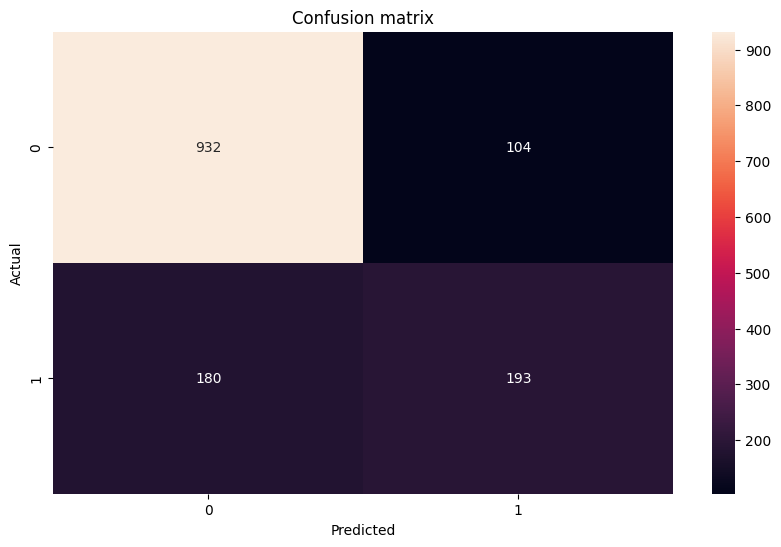

In [36]:
import seaborn as sns
cm = tf.math.confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
dt1 = data.copy()

In [39]:
dt1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0,1,0,0.013889,0,0,0,1,0,0,...,0.001275,0,0,0,1,0,0,0,0,0
1,0,0,0,0.472222,1,0,1,0,1,0,...,0.215867,0,1,0,0,1,1,0,0,0
2,0,0,0,0.027778,1,0,1,1,0,0,...,0.010310,1,1,0,0,1,0,0,0,0
3,0,0,0,0.625000,0,0,1,0,1,1,...,0.210241,0,1,0,0,0,1,0,0,0
4,0,0,0,0.027778,1,0,0,0,0,0,...,0.015330,1,0,0,1,0,0,0,1,0


if our model has type2 error maximum in such cases you shuld try to reduce it.

In [41]:
X = dt1.drop(columns =['Churn','gender_Male','StreamingMovies','StreamingTV','Partner','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection'])
y = dt1['Churn']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=50 , batch_size=32,validation_data=(X_test,y_test))

Streaming output truncated to the last 5000 lines.
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_multi_step_on_iterator_75023 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
151/177 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7943 - loss: 0.4154Executing op __inference_multi_step_on_iterator_75023 in

In [44]:
model.evaluate(X_test,y_test)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pr

[0.4029630124568939, 0.8055358529090881]

In [47]:
y_predicted = model.predict(X_test)
y_predicted = np.where(y_predicted > 0.5 ,1 ,0)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Squeeze in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LessEqual in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op All in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LessEqual in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op All in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0


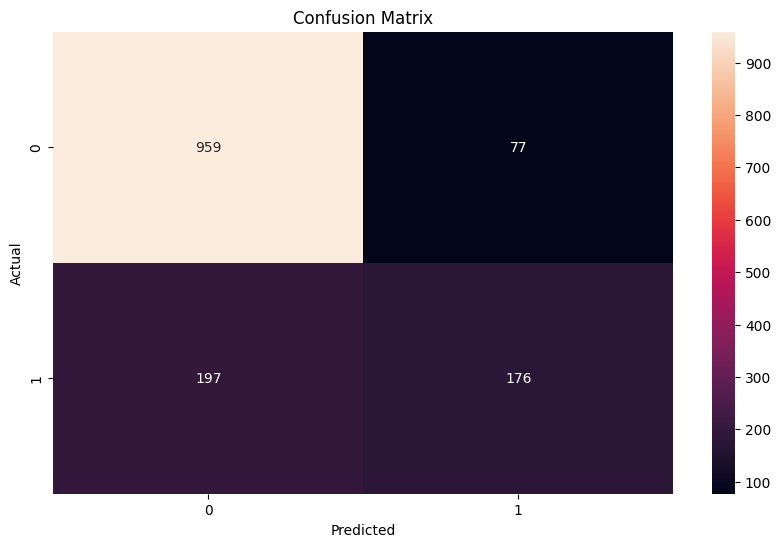

In [48]:
import seaborn as sns
cm = tf.math.confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,6))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Type I Error (False Positive):

This occurs when the model predicts a positive class (e.g., "Yes" for churn )when the actual class is negative (e.g., "No" for churn).

Type II Error (False Negative):

This occurs when the model predicts a negative class (e.g., "No" for churn) when the actual class is positive (e.g., "Yes" for churn).



Our Model Predict 0 well , but when churn is in actually 1 it not that  much able to predict correct .

It may happen due to imbalance data .
